In [1]:
import glob
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import load_model
import natsort

In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
physical_gpu = tf.config.list_physical_devices('GPU')
print(len(physical_gpu))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11699304581299673266
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1981665430872346253
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3049888155
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10119743931893491248
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:08:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2301507901765525383
physical_device_desc: "device: XLA_GPU device"
]
1


In [3]:
# dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
seed = 0
tf.random.set_seed(seed)

model_metrics = 'acc'    # acc, mse, mae (epoch마다 표시)
num_epochs = 10
num_batch = 100
num_split = 0.2

In [5]:
#새로운 feature 추가 데이터
new_H_path= 'D:/sensors journal/TT_H/train/new/txt'
new_H_files = glob.glob(os.path.join(new_H_path, "*.txt"))
new_H_files = natsort.natsorted(new_H_files)
print(new_H_files)
new_H_each_file = (pd.read_csv(f, header=None, sep = "\t") for f in new_H_files)

['D:/sensors journal/TT_H/train/new/txt\\1.txt', 'D:/sensors journal/TT_H/train/new/txt\\2.txt', 'D:/sensors journal/TT_H/train/new/txt\\3.txt', 'D:/sensors journal/TT_H/train/new/txt\\4.txt', 'D:/sensors journal/TT_H/train/new/txt\\5.txt', 'D:/sensors journal/TT_H/train/new/txt\\6.txt', 'D:/sensors journal/TT_H/train/new/txt\\7.txt', 'D:/sensors journal/TT_H/train/new/txt\\8.txt', 'D:/sensors journal/TT_H/train/new/txt\\9.txt', 'D:/sensors journal/TT_H/train/new/txt\\10.txt', 'D:/sensors journal/TT_H/train/new/txt\\11.txt', 'D:/sensors journal/TT_H/train/new/txt\\12.txt', 'D:/sensors journal/TT_H/train/new/txt\\13.txt', 'D:/sensors journal/TT_H/train/new/txt\\14.txt', 'D:/sensors journal/TT_H/train/new/txt\\15.txt', 'D:/sensors journal/TT_H/train/new/txt\\16.txt', 'D:/sensors journal/TT_H/train/new/txt\\17.txt', 'D:/sensors journal/TT_H/train/new/txt\\18.txt', 'D:/sensors journal/TT_H/train/new/txt\\19.txt', 'D:/sensors journal/TT_H/train/new/txt\\20.txt', 'D:/sensors journal/TT_H/tra

In [6]:
#test 데이터
test_H_path= 'D:/sensors journal/TT_H/test/new/txt'
test_H_files = glob.glob(os.path.join(test_H_path, "*.txt"))
test_H_files = natsort.natsorted(test_H_files)
print(test_H_files)
test_H_each_file = (pd.read_csv(f, header=None, sep = "\t") for f in test_H_files)

['D:/sensors journal/TT_H/test/new/txt\\1.txt', 'D:/sensors journal/TT_H/test/new/txt\\2.txt', 'D:/sensors journal/TT_H/test/new/txt\\3.txt', 'D:/sensors journal/TT_H/test/new/txt\\4.txt', 'D:/sensors journal/TT_H/test/new/txt\\5.txt', 'D:/sensors journal/TT_H/test/new/txt\\6.txt', 'D:/sensors journal/TT_H/test/new/txt\\7.txt', 'D:/sensors journal/TT_H/test/new/txt\\8.txt', 'D:/sensors journal/TT_H/test/new/txt\\9.txt', 'D:/sensors journal/TT_H/test/new/txt\\10.txt', 'D:/sensors journal/TT_H/test/new/txt\\11.txt', 'D:/sensors journal/TT_H/test/new/txt\\12.txt', 'D:/sensors journal/TT_H/test/new/txt\\13.txt', 'D:/sensors journal/TT_H/test/new/txt\\14.txt', 'D:/sensors journal/TT_H/test/new/txt\\15.txt', 'D:/sensors journal/TT_H/test/new/txt\\16.txt', 'D:/sensors journal/TT_H/test/new/txt\\17.txt', 'D:/sensors journal/TT_H/test/new/txt\\18.txt', 'D:/sensors journal/TT_H/test/new/txt\\19.txt', 'D:/sensors journal/TT_H/test/new/txt\\20.txt', 'D:/sensors journal/TT_H/test/new/txt\\21.txt', 

In [7]:
#subsampling x
new_H_file_list = list(new_H_each_file)
new_input_num = 14
new_df = pd.DataFrame()
for data in  new_H_file_list:
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    new_df = pd.concat([new_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(new_df), '\n')

0:  4368
1:  933
concat:  5301 

0:  10181
1:  1500
concat:  16982 

0:  5098
1:  759
concat:  22839 

0:  3025
1:  453
concat:  26317 

0:  15434
1:  1772
concat:  43523 

0:  1417
1:  151
concat:  45091 

0:  3557
1:  605
concat:  49253 

0:  2146
1:  413
concat:  51812 

0:  1435
1:  284
concat:  53531 

0:  3739
1:  564
concat:  57834 

0:  5419
1:  1092
concat:  64345 

0:  15407
1:  2375
concat:  82127 

0:  6721
1:  789
concat:  89637 

0:  3556
1:  389
concat:  93582 

0:  25284
1:  3221
concat:  122087 

0:  2649
1:  281
concat:  125017 

0:  5155
1:  734
concat:  130906 

0:  1902
1:  341
concat:  133149 

0:  2401
1:  336
concat:  135886 

0:  4088
1:  484
concat:  140458 

0:  5345
1:  1035
concat:  146838 

0:  15416
1:  2622
concat:  164876 

0:  7762
1:  974
concat:  173612 

0:  3555
1:  352
concat:  177519 

0:  26881
1:  3239
concat:  207639 

0:  1623
1:  178
concat:  209440 

0:  6348
1:  1088
concat:  216876 

0:  3325
1:  614
concat:  220815 

0:  2884
1:  407
con

concat:  3198352 

0:  47777
1:  8261
concat:  3254390 

0:  8488
1:  485
concat:  3263363 

0:  9363
1:  643
concat:  3273369 

0:  16312
1:  2062
concat:  3291743 

0:  4941
1:  541
concat:  3297225 

0:  20965
1:  3915
concat:  3322105 

0:  6880
1:  457
concat:  3329442 

0:  9811
1:  582
concat:  3339835 

0:  18116
1:  2439
concat:  3360390 

0:  2565
1:  297
concat:  3363252 

0:  3915
1:  225
concat:  3367392 

0:  34521
1:  5599
concat:  3407512 

0:  27795
1:  4794
concat:  3440101 

0:  2639
1:  413
concat:  3443153 

0:  405
1:  47
concat:  3443605 

0:  2940
1:  748
concat:  3447293 

0:  3151
1:  848
concat:  3451292 

0:  40342
1:  7171
concat:  3498805 

0:  3659
1:  176
concat:  3502640 

0:  28873
1:  2824
concat:  3534337 

0:  34820
1:  2857
concat:  3572014 

0:  8827
1:  65
concat:  3580906 

0:  16123
1:  2579
concat:  3599608 

0:  11841
1:  1584
concat:  3613033 

0:  1832
1:  67
concat:  3614932 

0:  16740
1:  1034
concat:  3632706 

0:  1886
1:  158
concat: 

In [8]:
#subsampling x 
test_H_file_list = list(test_H_each_file)
test_df = pd.DataFrame()
for data in  test_H_file_list:
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    test_df = pd.concat([test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(test_df), '\n')

0:  92945
1:  14260
concat:  107205 

0:  2491
1:  564
concat:  110260 

0:  9472
1:  2450
concat:  122182 

0:  7750
1:  1991
concat:  131923 

0:  26492
1:  6328
concat:  164743 

0:  2230
1:  622
concat:  167595 

0:  2646
1:  661
concat:  170902 

0:  40727
1:  8798
concat:  220427 

0:  132282
1:  14669
concat:  367378 

0:  9998
1:  3592
concat:  380968 

0:  9159
1:  2275
concat:  392402 

0:  1865
1:  697
concat:  394964 

0:  38025
1:  9605
concat:  442594 

0:  94108
1:  10817
concat:  547519 

0:  118933
1:  22124
concat:  688576 

0:  35063
1:  1124
concat:  724763 

0:  15334
1:  3063
concat:  743160 

0:  10751
1:  1506
concat:  755417 

0:  11054
1:  1796
concat:  768267 

0:  35538
1:  5375
concat:  809180 

0:  14239
1:  2471
concat:  825890 

0:  64250
1:  6549
concat:  896689 



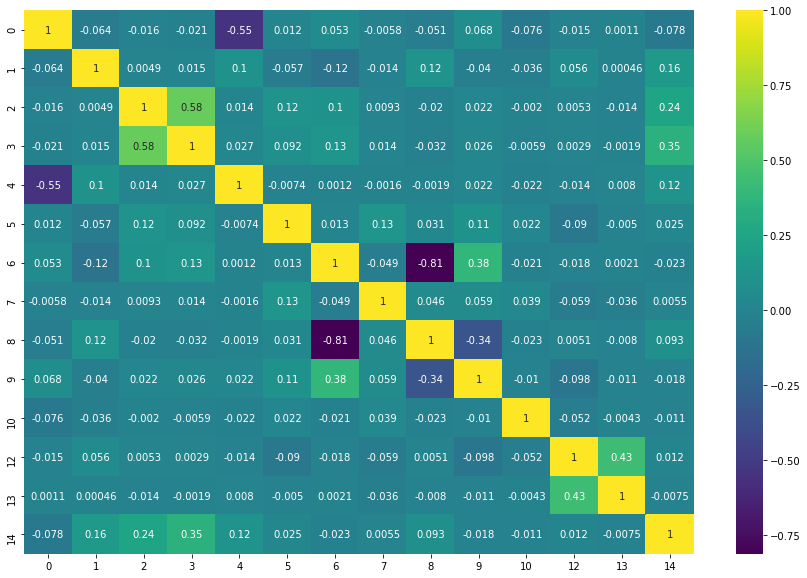

In [9]:
import seaborn as sns
new_df = new_df.drop([new_df.columns[11]], axis = 1)
plt.figure(figsize = (15, 10))
corr = new_df.corr()
#print(corr)
sns.heatmap(corr, cmap = 'viridis', annot = True)
plt.show()

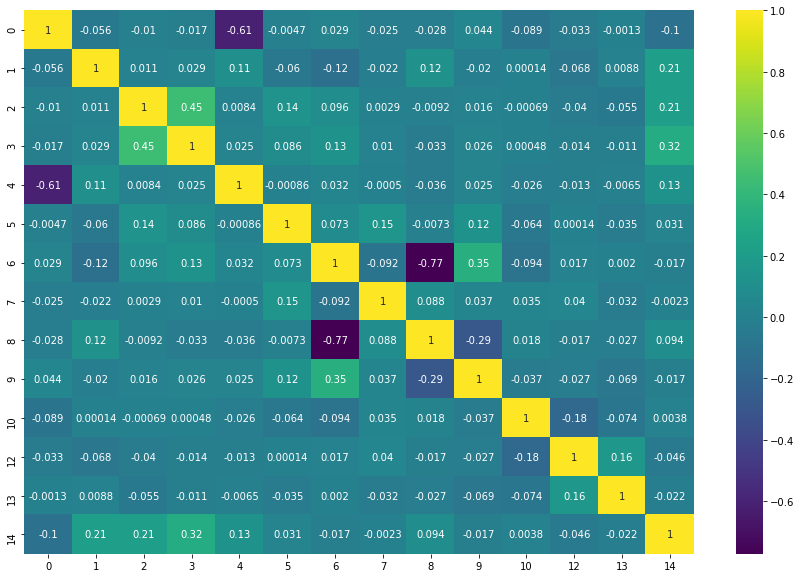

In [10]:
import seaborn as sns
test_df = test_df.drop([test_df.columns[11]], axis = 1)
plt.figure(figsize = (15, 10))
corr = test_df.corr()
#print(corr)
sns.heatmap(corr, cmap = 'viridis', annot = True)
plt.show()

In [11]:
new_df = new_df.to_numpy() 

In [12]:
test_df = test_df.to_numpy()

In [13]:
# new
new_inp_num = 13
x_new = new_df[:, 0:new_inp_num]
y_new = new_df[:, new_inp_num]
X_train_new, X_val_new, Y_train_new, Y_val_new = train_test_split(x_new, y_new, test_size=0.2, stratify=y_new, random_state=seed)

In [14]:
# test
x_test = test_df[:, 0:new_inp_num]
y_test = test_df[:, new_inp_num]

In [15]:
# DT - depth 5

start = time.time() 

dt_depth5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=seed)
dt_depth5.fit(x_new, y_new)

print("훈련 세트 정확도: {:.3f}".format(dt_depth5.score(x_new, y_new)))
pred_dt = dt_depth5.predict(x_test)
accuracy_dt = []

accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[0])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth5.feature_importances_))

훈련 세트 정확도: 0.892
Accuracy: 0.8666
time : 32.1842155456543

feature importance: 
[0.         0.16158345 0.02940566 0.71582019 0.01741467 0.
 0.0223715  0.         0.05198543 0.         0.00141911 0.
 0.        ]


In [16]:
dot_data = export_graphviz(dt_depth5, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dt_depth5_org.png')

True

In [17]:
# DT - depth 6

start = time.time() 

dt_depth6 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=seed)
dt_depth6.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth6.score(x_new, y_new)))

pred_dt = dt_depth6.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[1])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth6.feature_importances_))

훈련 세트 정확도: 0.892
Accuracy: 0.8678
time : 36.13610076904297

feature importance: 
[8.48050993e-04 1.56446724e-01 3.14127177e-02 6.95112138e-01
 2.21395052e-02 5.22111166e-03 3.64725894e-02 0.00000000e+00
 5.03207267e-02 4.03681877e-04 1.50278342e-03 1.19971259e-04
 0.00000000e+00]


In [18]:
dot_data = export_graphviz(dt_depth6, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dt_depth6_org.png')

True

In [19]:
# DT - depth 7

start = time.time() 

dt_depth7 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=seed)
dt_depth7.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth7.score(x_new, y_new)))

pred_dt = dt_depth7.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[2])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth7.feature_importances_))

훈련 세트 정확도: 0.892
Accuracy: 0.8685
time : 40.54309034347534

feature importance: 
[9.13071775e-04 1.53206297e-01 3.17947732e-02 6.80379588e-01
 2.23826857e-02 1.38189431e-02 4.29616301e-02 0.00000000e+00
 4.99754042e-02 1.10524156e-03 3.25557840e-03 2.03304990e-04
 3.48159992e-06]


In [20]:
dot_data = export_graphviz(dt_depth7, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dt_depth7_org.png')

True

In [21]:
#Test Accuracy 22개 영상, subsampling x
i=1
for data in  test_H_file_list:
    each_test_df = pd.DataFrame()
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    each_test_df = pd.concat([each_test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(each_test_df), '\n')
    each_test_df = each_test_df.drop([each_test_df.columns[11]], axis = 1)
    each_test_df = each_test_df.to_numpy()
    new_inp_num = 13
    each_x_test = each_test_df[:, 0:new_inp_num]
    each_y_test = each_test_df[:, new_inp_num]
    each_pred_dt = dt_depth7.predict(each_x_test)
    evaluation_accuracy = accuracy_score(each_y_test, each_pred_dt) 
    print(str(i)+". "+'Accuracy: %.4f\n' % evaluation_accuracy)
    i=i+1
    del each_pred_dt

0:  92945
1:  14260
concat:  107205 

1. Accuracy: 0.8687

0:  2491
1:  564
concat:  3055 

2. Accuracy: 0.8265

0:  9472
1:  2450
concat:  11922 

3. Accuracy: 0.8109

0:  7750
1:  1991
concat:  9741 

4. Accuracy: 0.8096

0:  26492
1:  6328
concat:  32820 

5. Accuracy: 0.8119

0:  2230
1:  622
concat:  2852 

6. Accuracy: 0.8022

0:  2646
1:  661
concat:  3307 

7. Accuracy: 0.8146

0:  40727
1:  8798
concat:  49525 

8. Accuracy: 0.8315

0:  132282
1:  14669
concat:  146951 

9. Accuracy: 0.9006

0:  9998
1:  3592
concat:  13590 

10. Accuracy: 0.7561

0:  9159
1:  2275
concat:  11434 

11. Accuracy: 0.8148

0:  1865
1:  697
concat:  2562 

12. Accuracy: 0.7494

0:  38025
1:  9605
concat:  47630 

13. Accuracy: 0.8138

0:  94108
1:  10817
concat:  104925 

14. Accuracy: 0.8987

0:  118933
1:  22124
concat:  141057 

15. Accuracy: 0.8445

0:  35063
1:  1124
concat:  36187 

16. Accuracy: 0.9684

0:  15334
1:  3063
concat:  18397 

17. Accuracy: 0.8449

0:  10751
1:  1506
concat:  12

In [22]:
# DT - depth 8

start = time.time() 

dt_depth8 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=seed)
dt_depth8.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth8.score(x_new, y_new)))

pred_dt = dt_depth8.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[3])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth8.feature_importances_))

훈련 세트 정확도: 0.893
Accuracy: 0.8690
time : 44.95907735824585

feature importance: 
[1.04839815e-03 1.50997013e-01 3.21568837e-02 6.69236879e-01
 2.20147382e-02 2.10894173e-02 4.46749928e-02 0.00000000e+00
 5.06407767e-02 2.44117002e-03 4.75655141e-03 8.96013859e-04
 4.71663618e-05]


In [23]:
dot_data = export_graphviz(dt_depth8, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dt_depth8_org.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.775293 to fit



True

In [24]:
#Test Accuracy 22개 영상, subsampling x
i=1
for data in  test_H_file_list:
    each_test_df = pd.DataFrame()
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    each_test_df = pd.concat([each_test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(each_test_df), '\n')
    each_test_df = each_test_df.drop([each_test_df.columns[11]], axis = 1)
    each_test_df = each_test_df.to_numpy()
    new_inp_num = 13
    each_x_test = each_test_df[:, 0:new_inp_num]
    each_y_test = each_test_df[:, new_inp_num]
    each_pred_dt = dt_depth8.predict(each_x_test)
    evaluation_accuracy = accuracy_score(each_y_test, each_pred_dt) 
    print(str(i)+". "+'Accuracy: %.4f\n' % evaluation_accuracy)
    i=i+1
    del each_pred_dt

0:  92945
1:  14260
concat:  107205 

1. Accuracy: 0.8689

0:  2491
1:  564
concat:  3055 

2. Accuracy: 0.8242

0:  9472
1:  2450
concat:  11922 

3. Accuracy: 0.8088

0:  7750
1:  1991
concat:  9741 

4. Accuracy: 0.8080

0:  26492
1:  6328
concat:  32820 

5. Accuracy: 0.8146

0:  2230
1:  622
concat:  2852 

6. Accuracy: 0.8012

0:  2646
1:  661
concat:  3307 

7. Accuracy: 0.8164

0:  40727
1:  8798
concat:  49525 

8. Accuracy: 0.8304

0:  132282
1:  14669
concat:  146951 

9. Accuracy: 0.9011

0:  9998
1:  3592
concat:  13590 

10. Accuracy: 0.7535

0:  9159
1:  2275
concat:  11434 

11. Accuracy: 0.8151

0:  1865
1:  697
concat:  2562 

12. Accuracy: 0.7463

0:  38025
1:  9605
concat:  47630 

13. Accuracy: 0.8122

0:  94108
1:  10817
concat:  104925 

14. Accuracy: 0.8999

0:  118933
1:  22124
concat:  141057 

15. Accuracy: 0.8466

0:  35063
1:  1124
concat:  36187 

16. Accuracy: 0.9686

0:  15334
1:  3063
concat:  18397 

17. Accuracy: 0.8426

0:  10751
1:  1506
concat:  12

In [25]:
# DT - depth 9

start = time.time() 

dt_depth9 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=seed)
dt_depth9.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth9.score(x_new, y_new)))

pred_dt = dt_depth9.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[4])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth9.feature_importances_))

훈련 세트 정확도: 0.893
Accuracy: 0.8691
time : 48.80694007873535

feature importance: 
[2.05674911e-03 1.49378403e-01 3.23904135e-02 6.61865541e-01
 2.23142446e-02 2.49204174e-02 4.46841405e-02 2.15790621e-05
 5.00936739e-02 3.72787535e-03 6.80692669e-03 1.49797655e-03
 2.42058736e-04]


In [35]:
#Test Accuracy 22개 영상, subsampling x
i=1
for data in  test_H_file_list:
    each_test_df = pd.DataFrame()
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    each_test_df = pd.concat([each_test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(each_test_df), '\n')
    each_test_df = each_test_df.drop([each_test_df.columns[11]], axis = 1)
    each_test_df = each_test_df.to_numpy()
    new_inp_num = 13
    each_x_test = each_test_df[:, 0:new_inp_num]
    each_y_test = each_test_df[:, new_inp_num]
    each_pred_dt = dt_depth9.predict(each_x_test)
    evaluation_accuracy = accuracy_score(each_y_test, each_pred_dt) 
    print(str(i)+". "+'Accuracy: %.4f\n' % evaluation_accuracy)
    i=i+1
    del each_pred_dt

0:  92945
1:  14260
concat:  107205 

1. Accuracy: 0.8693

0:  2491
1:  564
concat:  3055 

2. Accuracy: 0.8219

0:  9472
1:  2450
concat:  11922 

3. Accuracy: 0.8091

0:  7750
1:  1991
concat:  9741 

4. Accuracy: 0.8073

0:  26492
1:  6328
concat:  32820 

5. Accuracy: 0.8142

0:  2230
1:  622
concat:  2852 

6. Accuracy: 0.8001

0:  2646
1:  661
concat:  3307 

7. Accuracy: 0.8180

0:  40727
1:  8798
concat:  49525 

8. Accuracy: 0.8317

0:  132282
1:  14669
concat:  146951 

9. Accuracy: 0.9012

0:  9998
1:  3592
concat:  13590 

10. Accuracy: 0.7519

0:  9159
1:  2275
concat:  11434 

11. Accuracy: 0.8131

0:  1865
1:  697
concat:  2562 

12. Accuracy: 0.7459

0:  38025
1:  9605
concat:  47630 

13. Accuracy: 0.8109

0:  94108
1:  10817
concat:  104925 

14. Accuracy: 0.9001

0:  118933
1:  22124
concat:  141057 

15. Accuracy: 0.8471

0:  35063
1:  1124
concat:  36187 

16. Accuracy: 0.9686

0:  15334
1:  3063
concat:  18397 

17. Accuracy: 0.8408

0:  10751
1:  1506
concat:  12

In [26]:
# DT - depth 10

start = time.time() 

dt_depth10 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=seed)
dt_depth10.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth10.score(x_new, y_new)))

pred_dt = dt_depth10.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[5])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth10.feature_importances_))

훈련 세트 정확도: 0.893
Accuracy: 0.8686
time : 51.07244873046875

feature importance: 
[2.64072360e-03 1.47895963e-01 3.23840236e-02 6.54613067e-01
 2.26222611e-02 2.79478254e-02 4.48888828e-02 8.63142871e-05
 4.98100469e-02 5.16782358e-03 8.02731776e-03 3.07045073e-03
 8.45300209e-04]


In [27]:
# DT - depth 11

start = time.time() 

dt_depth11 = DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, random_state=seed)
dt_depth11.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth11.score(x_new, y_new)))

pred_dt = dt_depth11.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[6])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth11.feature_importances_))

훈련 세트 정확도: 0.893
Accuracy: 0.8682
time : 55.2563853263855

feature importance: 
[2.73349912e-03 1.46491286e-01 3.20838263e-02 6.47373012e-01
 2.24465369e-02 3.04244659e-02 4.55093072e-02 1.78611612e-04
 4.93171538e-02 6.74755310e-03 9.14412097e-03 5.64659262e-03
 1.90403441e-03]


In [28]:
# SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import PolynomialFeatures

# rf
from sklearn.ensemble import RandomForestClassifier

In [29]:
# SVM - C=1

start = time.time()  # 시작 시간 저장

svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=seed))
                  ])
svm_clf.fit(x_new, y_new)

pred_svm = svm_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_svm))

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

del svm_clf, pred_svm

Accuracy: 0.8647
time : 370.59469294548035


In [30]:
# rf - 5
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=5, random_state=seed)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8565
time : 89.88914942741394


In [31]:
# rf - 6
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=6, random_state=seed)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8592
time : 109.08245491981506


In [32]:
# rf - 7
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=7, random_state=seed)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8591
time : 124.22684621810913


In [33]:
# rf - 8
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=8, random_state=seed)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8602
time : 135.83244848251343


In [34]:
# rf - 9
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=9, random_state=seed)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8598
time : 165.63713026046753
